# Load and execute the model

In [1]:
import platform
print("python version " + platform.python_version())
import sys
import json
import re
import os
from os.path import exists
if exists("config.cfg"):
    from configparser import ConfigParser
    config = ConfigParser()
    config.read("config.cfg")
    paths = config.get("script", "syspaths").split(";")
    for path in paths:
        sys.path.append(path)

python version 3.7.6


The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than th

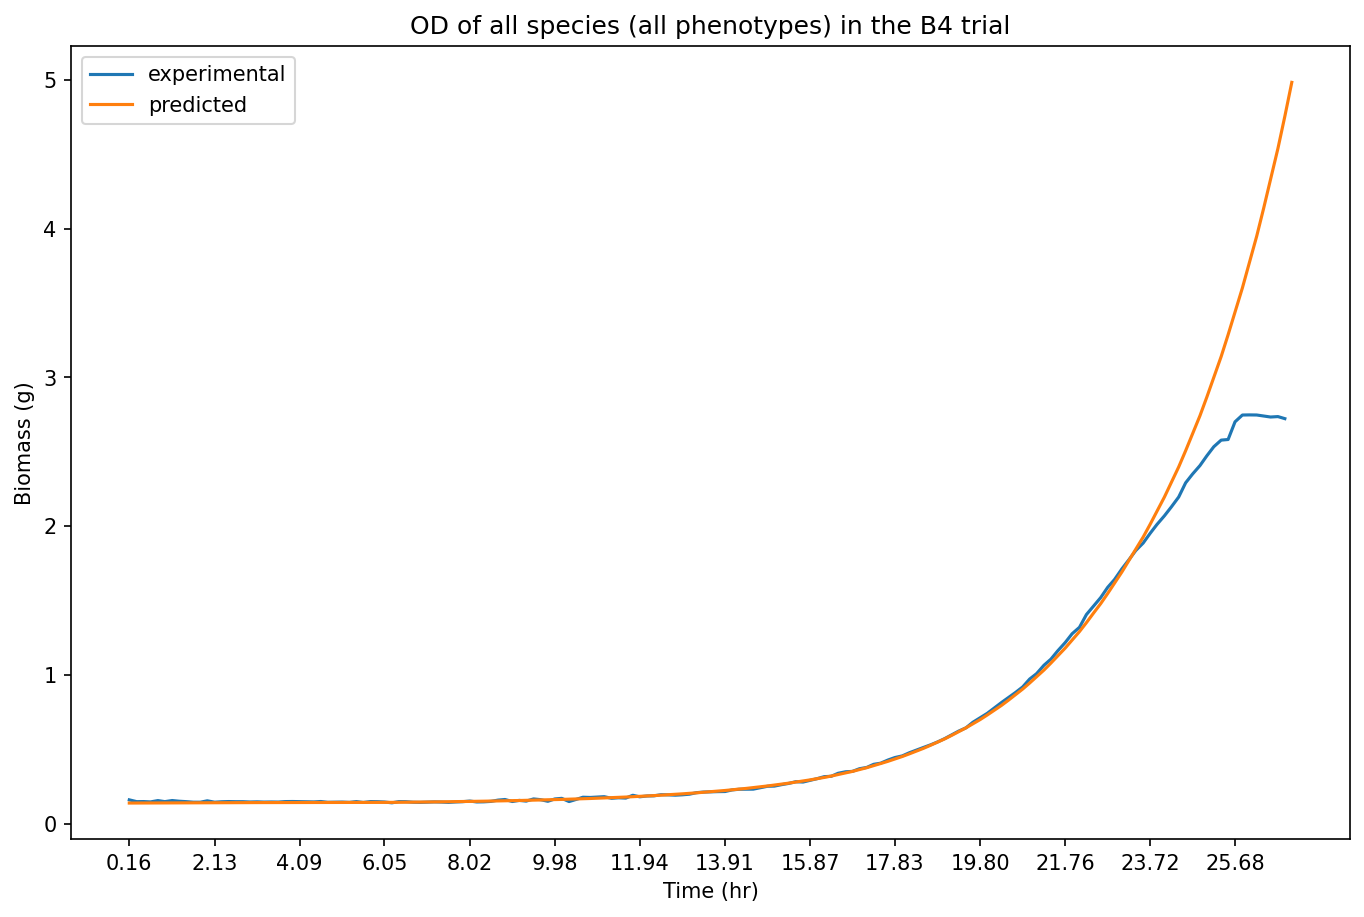

In [28]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'D', 'E', 'F']}, # 'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
    'v':0.3,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, zip_name='simple_full_community.zip',final_relative_carbon_conc = 0.1, metabolites_to_track = ["cpd00179","cpd00029","cpd00136"])
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip')
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Change the parameters

## Explore Vmax values

Done loading the JSON: 0.10859375 min
Done exporting the model: 0.44583333333333336 min
Done loading the model: 2.1434895833333334 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 2min 38s
Wall time: 2min 38s
growth Vmax: 0.1 objective value: 536111.8798909037 




2022-07-16 16:59:39.802761
Done loading the JSON: 0.13333333333333333 min
Done exporting the model: 0.4388020833333333 min
Done loading the model: 2.210677083333333 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 2min 55s
Wall time: 2min 55s
growth Vmax: 0.13333333333333336 objective value: 388874.9153763641 




2022-07-16 17:05:22.669535
Done loading the JSON: 0.03515625 min
Done exporting the model: 0.44635416666666666 min
Done loading the model: 2.1822916666666665 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype':

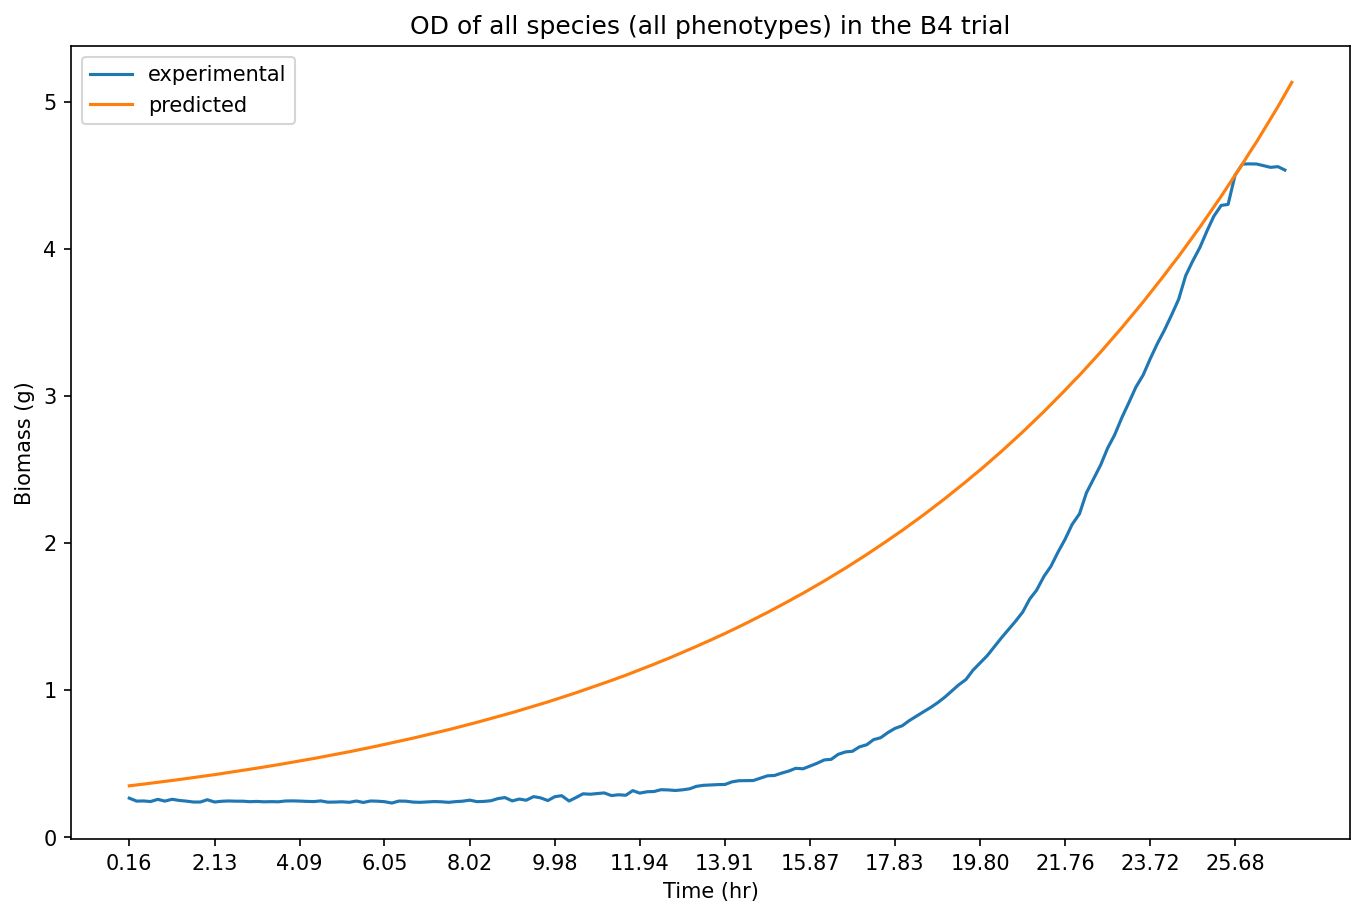

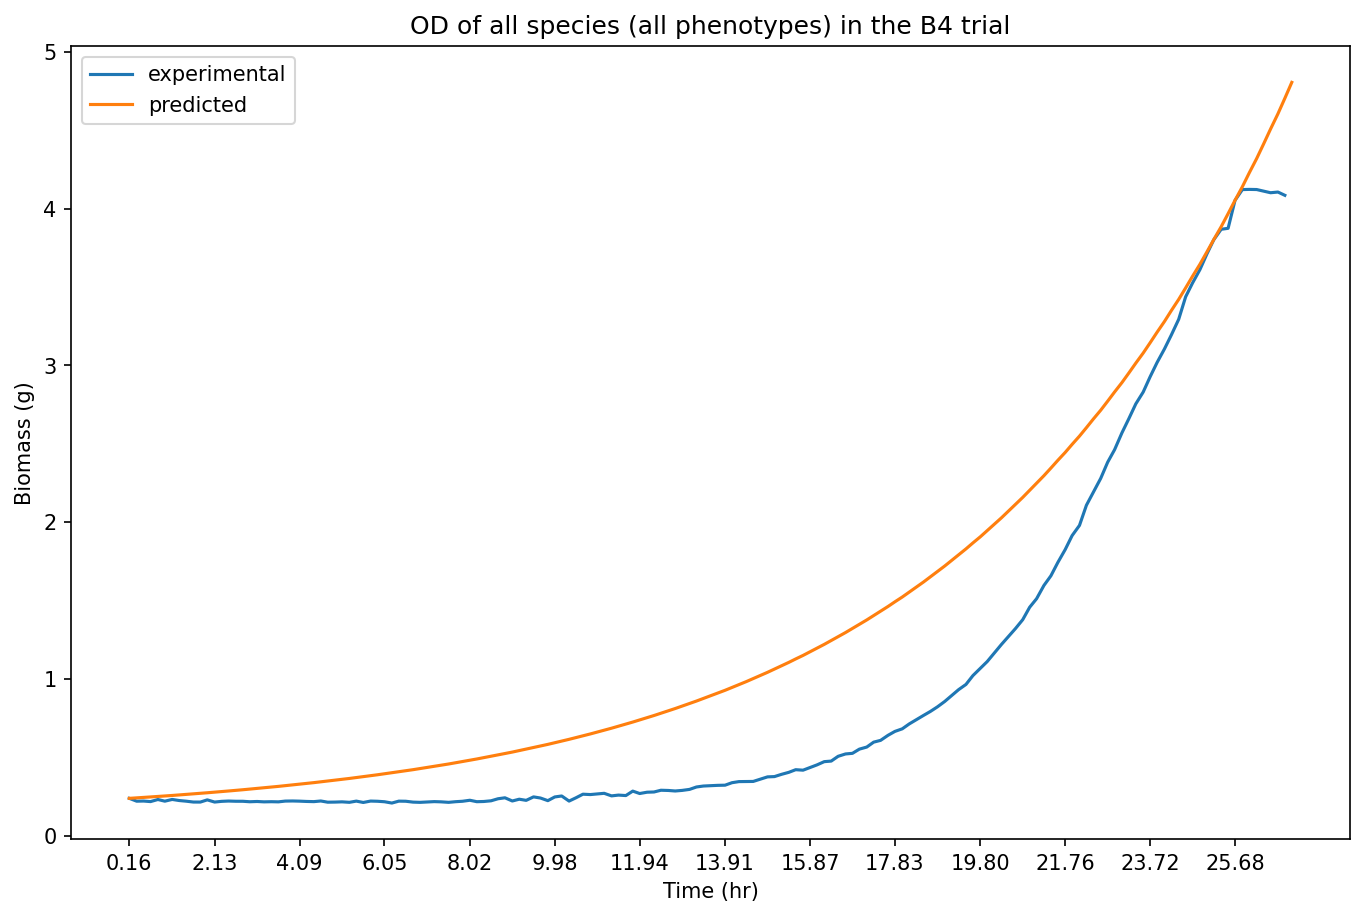

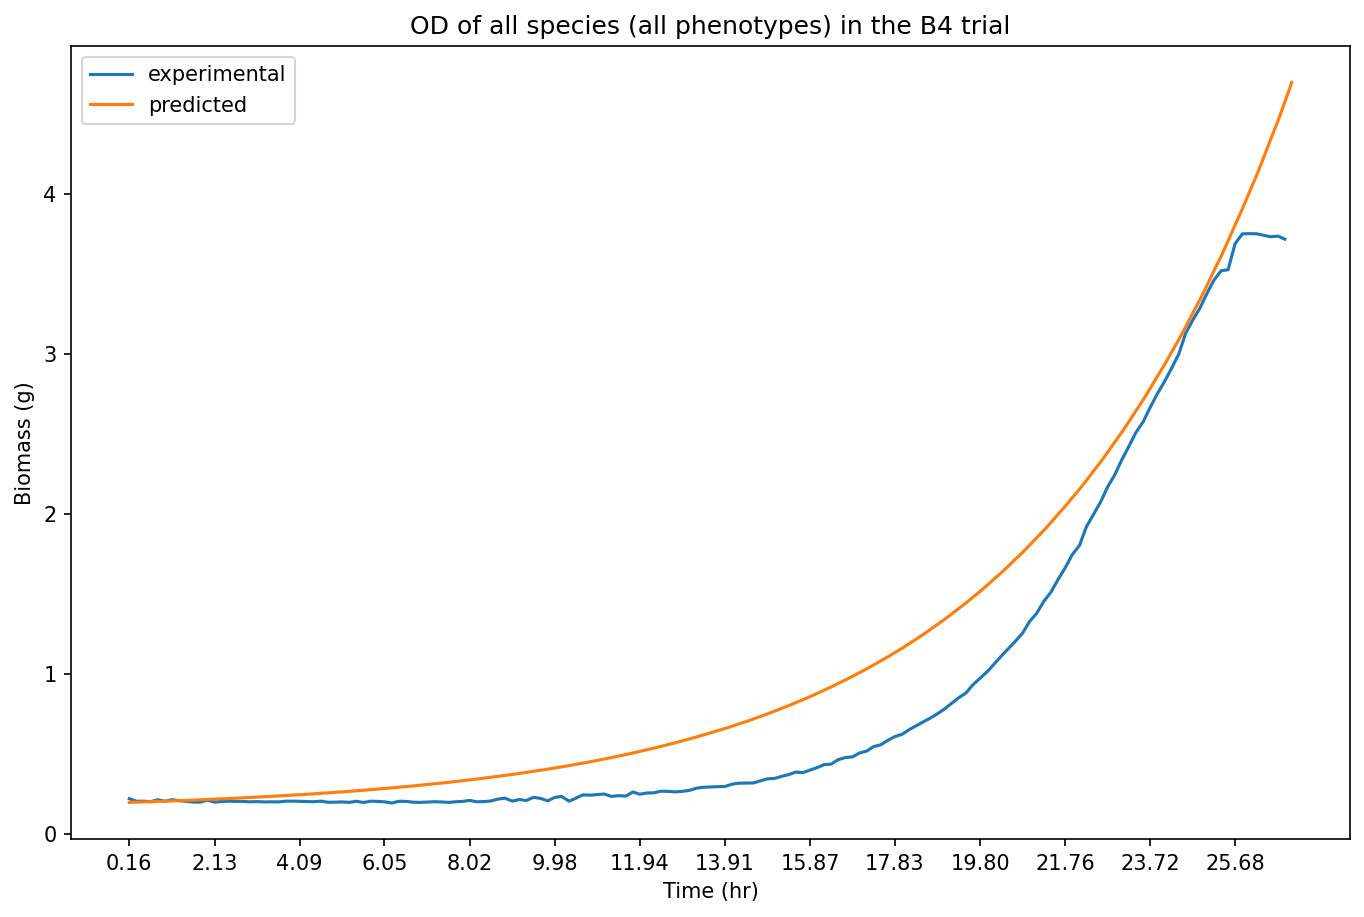

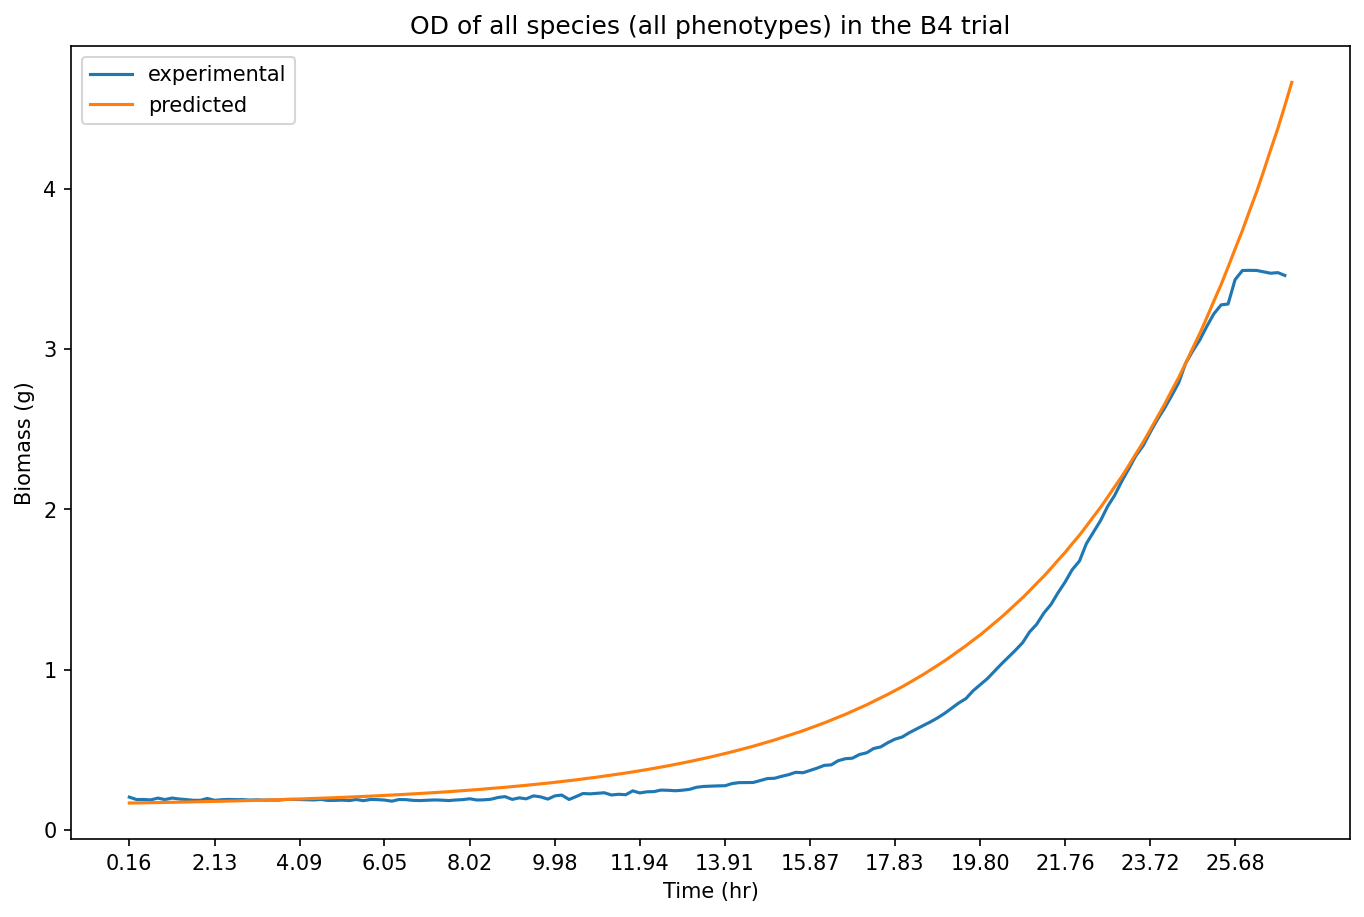

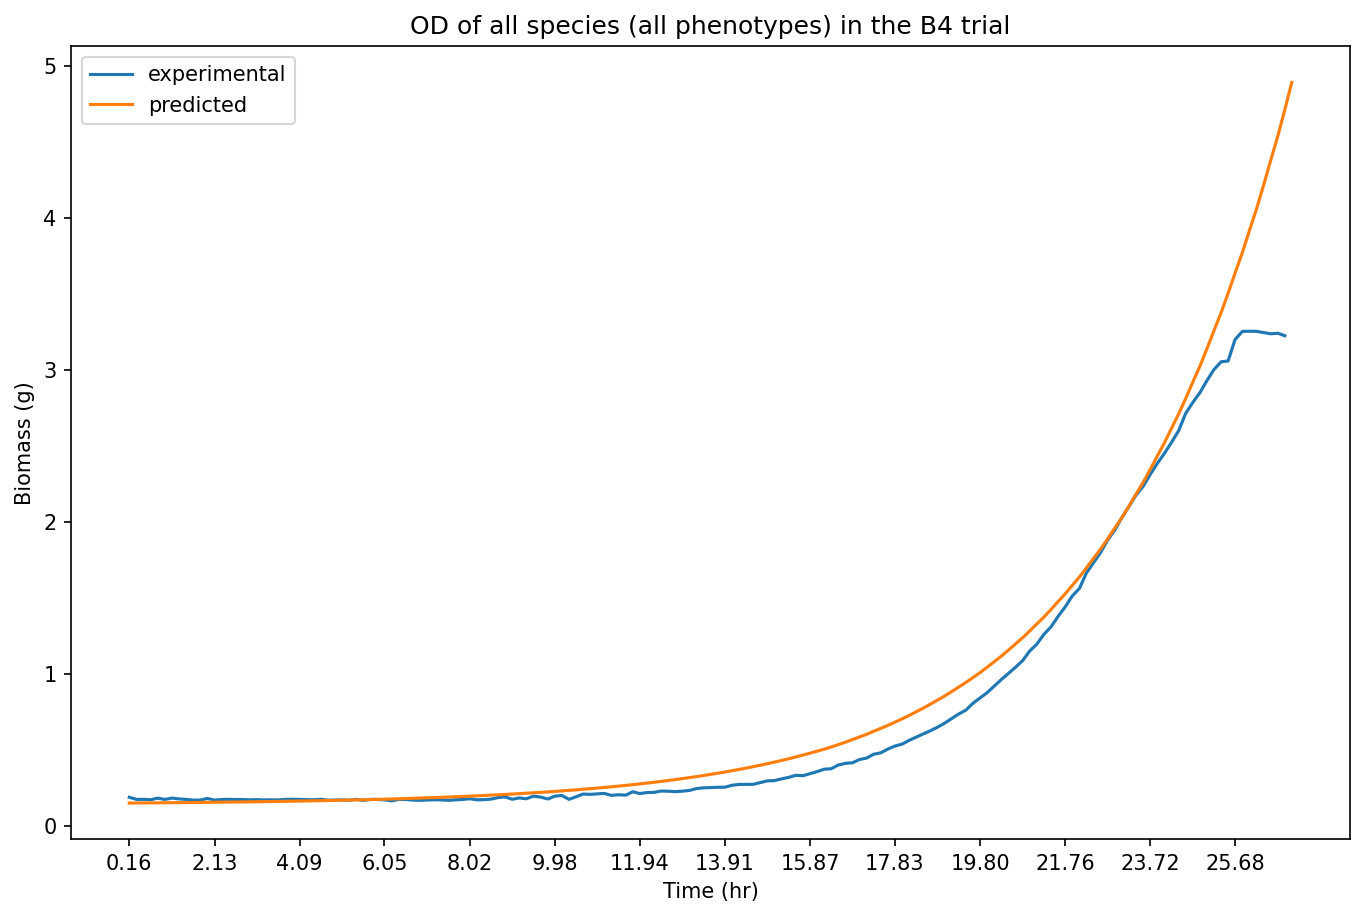

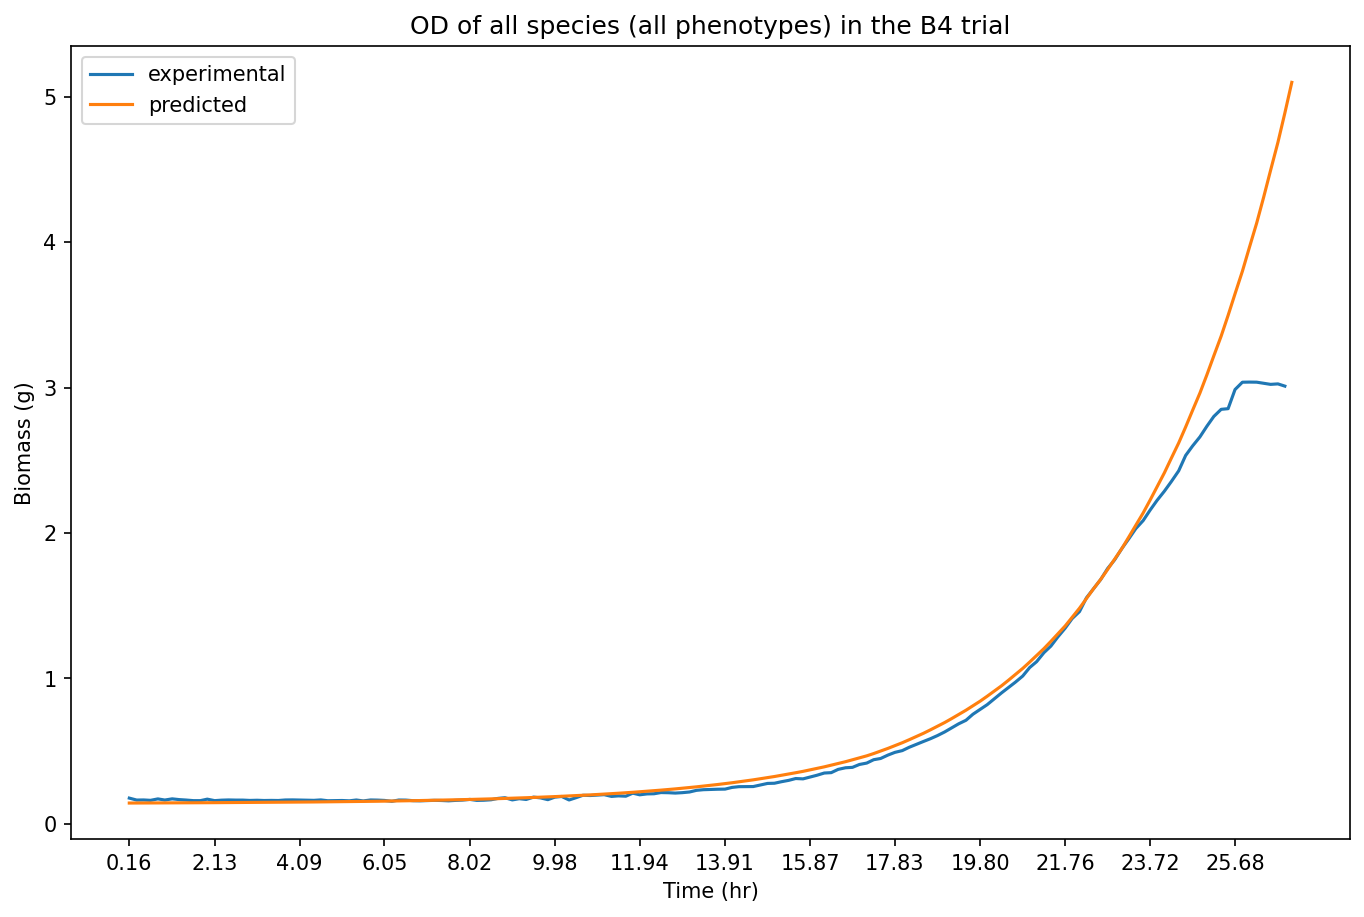

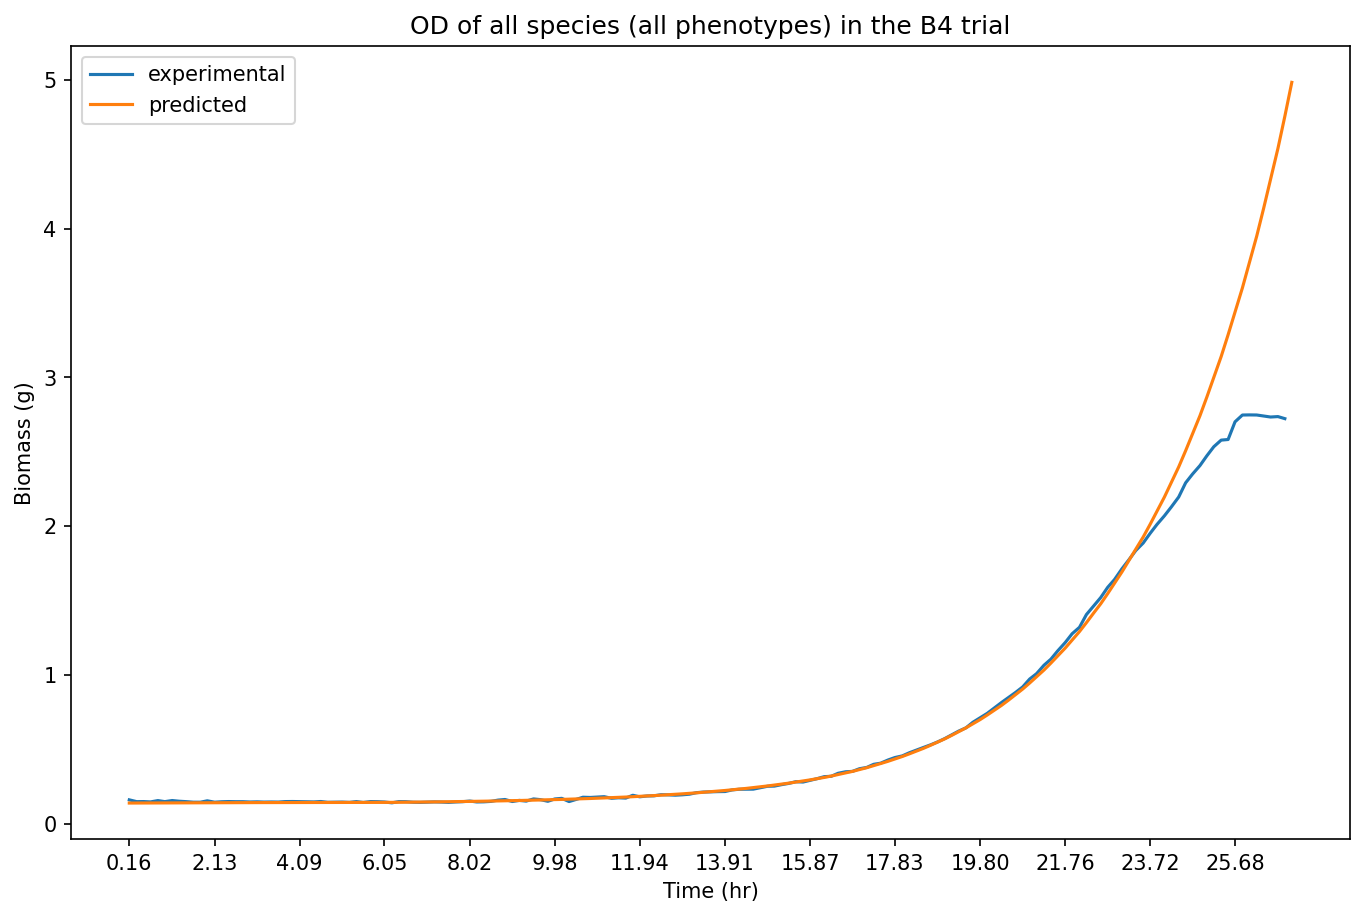

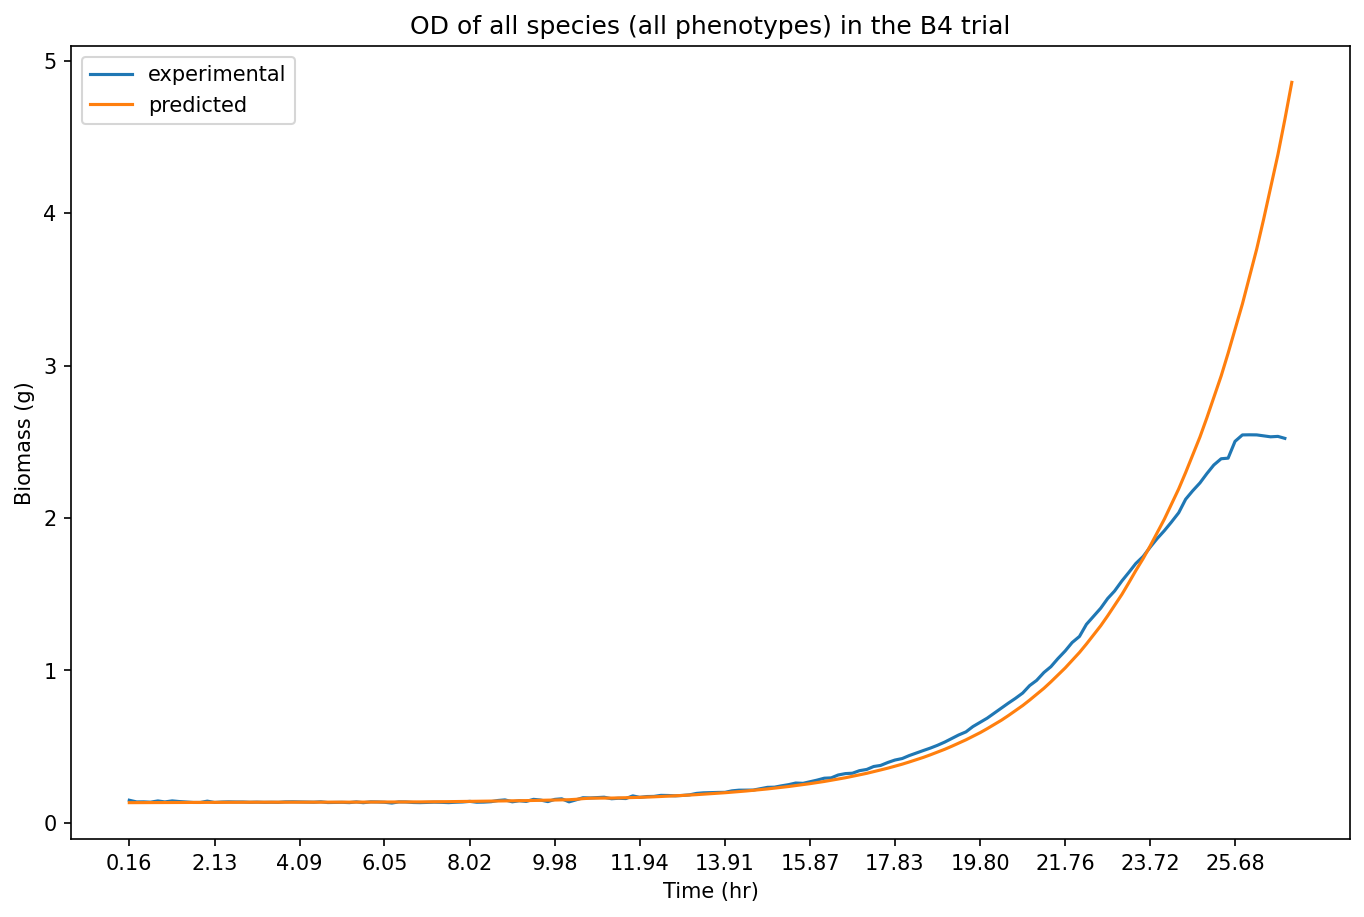

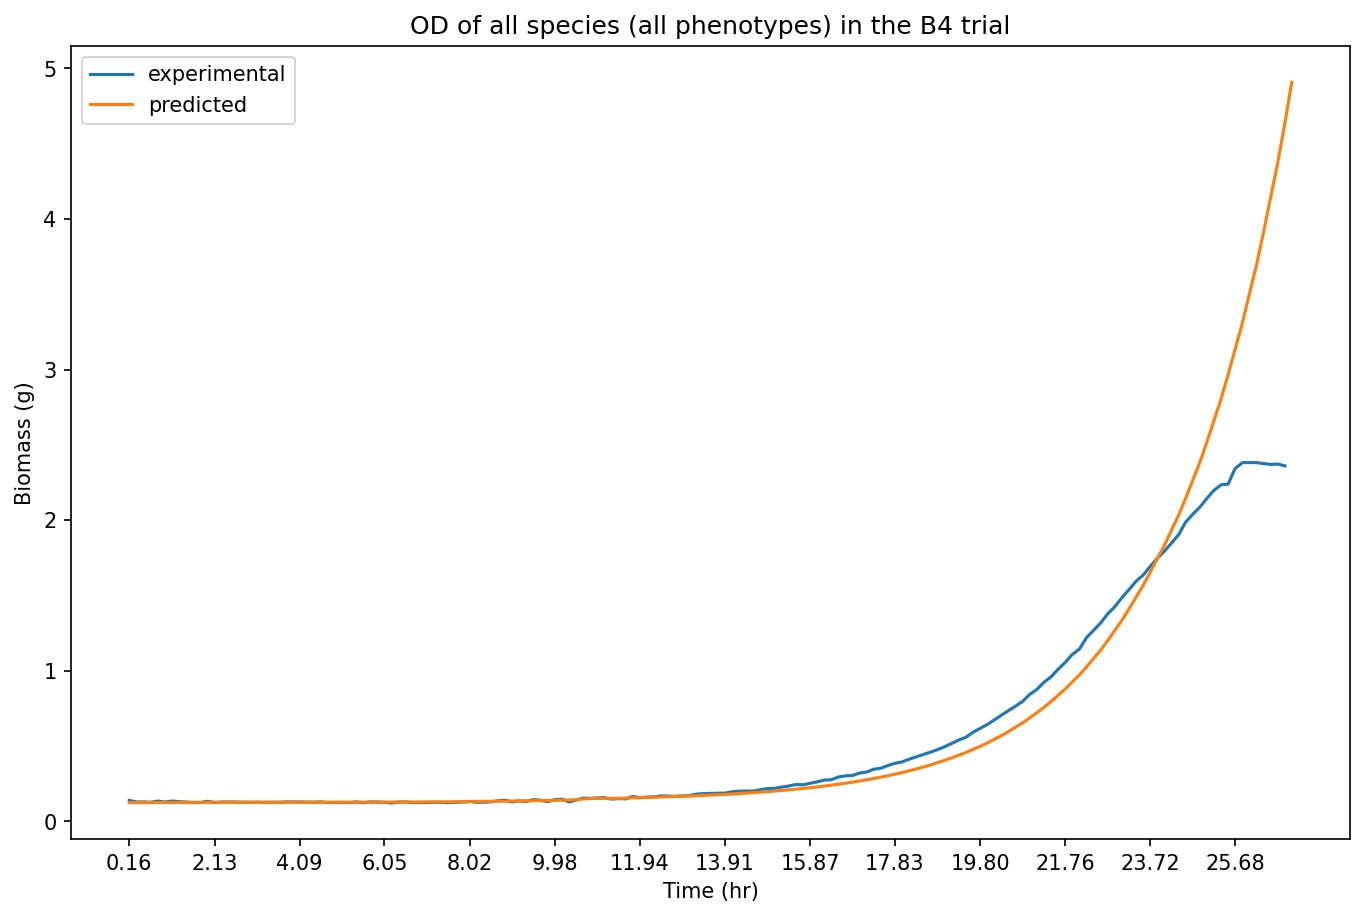

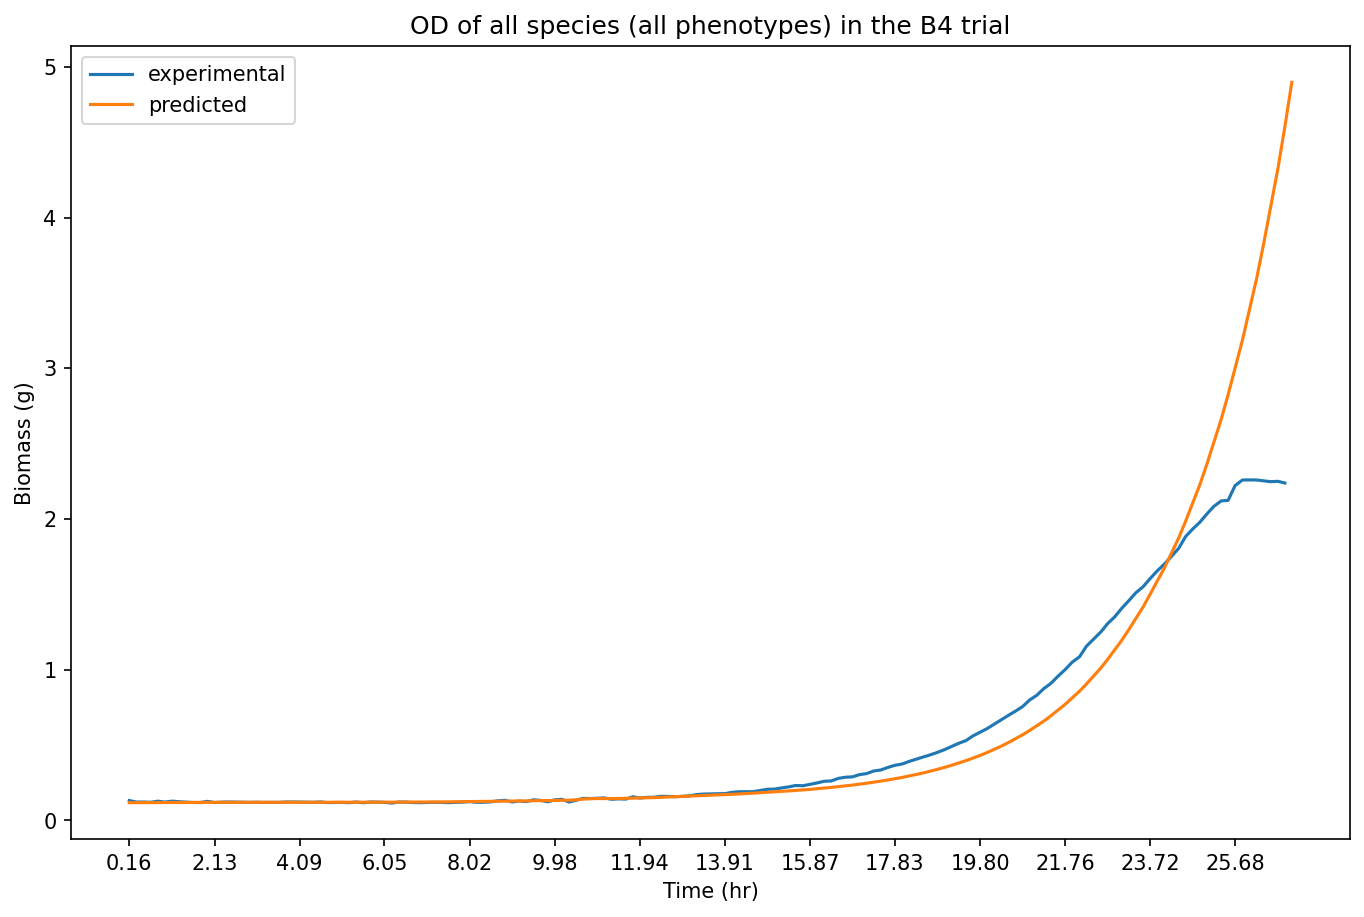

In [10]:
from numpy import linspace
%run mscommfitting.py

for vmax in linspace(.1,.4,10):
    mscommfit.change_parameters(vmax=-vmax, export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')
    %time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
    print(datetime.today())
    print('growth Vmax:', vmax, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

## Explore relative final concentrations

In [ ]:
from numpy import linspace
%run mscommfitting.py

previous_relative_conc = .1
for final_relative_carbon_conc in linspace(.1,.5,5):
    mscommfit.change_parameters(final_relative_carbon_conc=final_relative_carbon_conc, previous_relative_conc=previous_relative_conc, export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')
    %time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
    print(datetime.today())
    print('final_relative_carbon_conc:', final_relative_carbon_conc, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

Done loading the JSON: 0.11875 min
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'mscommfitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the model: 0.4578125 min
Done loading the model: 2.550520833333333 min


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'primal_values.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 3min 15s
Wall time: 3min 15s
2022-07-16 21:16:10.160858
final_relative_carbon_conc: 0.1 objective value: 218366.75508039558 






C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B4_all species_all phenotypes_OD.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done loading the JSON: 0.037760416666666664 min
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
Done exporting the model: 0.4544270833333333 min
